## Importar Librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Cargar el dataset

In [2]:
df = pd.read_csv('C:/Users/mitev/Desktop/Prácticas/chocolate_sales_proyect/dataset/Chocolate Sales.csv')

In [3]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
## Tenemos una columna Date, que se puede considerar como un rango de fechas para las ventas de chocolate,
## podemos considerar en transformarla para la parte de limpieza de datos para sacarle mejor provecho.

## EDA

In [5]:
df.shape

(1094, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sales Person,1094,25,Kelci Walkden,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1094,6,Australia,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1094,22,Eclairs,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1094,168,30-Jun-22,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1094,827,"$2,317",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boxes Shipped,1094.0,NaN,NaN,NaN,161.797989,121.544145,1.0,70.0,135.0,228.75,709.0


In [8]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [9]:
df[df.duplicated()]

,Sales Person,Country,Product,Date,Amount,Boxes Shipped


In [10]:
## Podemos ver que no tenemos valores nulos a considerar, ni tampoco valores duplicados,
## por lo tanto, es algo a tener en cuenta para la parte de limpieza de datos.

In [11]:
## En esta tabla agrupamos el país y product con cantidad de cajas enviadas, para poder ver las cantidades correspondientes
## por cada país y producto.

df.groupby(["Country", "Product"])["Boxes Shipped"].sum().unstack()

Product,50% Dark Bites,70% Dark Bites,85% Dark Bars,99% Dark & Pure,After Nines,Almond Choco,Baker's Choco Chips,Caramel Stuffed Bars,Choco Coated Almonds,Drinking Coco,...,Manuka Honey Choco,Milk Bars,Mint Chip Choco,Orange Choco,Organic Choco Syrup,Peanut Butter Cubes,Raspberry Choco,Smooth Sliky Salty,Spicy Special Slims,White Choc
Country,,,,,,,,,,,,,,,,,,,,,
Australia,3182,2103,1200,1350,912,2174,1257,594,718,1797,...,1439,1821,1079,1733,1693,1087,1291,1326,2050,1510
Canada,686,1578,950,1427,1350,556,985,2020,2452,1980,...,1523,829,1088,1719,1314,1492,971,2271,1659,701
India,1237,1511,1584,1455,1874,1296,1265,1635,1328,1101,...,991,1069,1516,1152,897,1445,788,722,2037,1629
New Zealand,939,933,1750,707,1316,625,812,1256,455,1213,...,1476,1335,2537,885,1952,1806,1218,1306,869,1267
UK,1943,1259,704,1396,999,990,2081,2184,1178,1531,...,1202,2251,1240,698,1120,1265,1350,1865,685,1929
USA,1805,631,1605,1792,1806,1095,598,1028,333,1038,...,1150,1025,747,1545,773,1209,1497,1320,1385,1204


In [12]:
## Otra manera de obtener el mismo resultado previo.

pivot_boxes_country_product = df.pivot_table(
    values="Boxes Shipped",
    index="Country",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)

In [13]:
pivot_boxes_country_product

Product,50% Dark Bites,70% Dark Bites,85% Dark Bars,99% Dark & Pure,After Nines,Almond Choco,Baker's Choco Chips,Caramel Stuffed Bars,Choco Coated Almonds,Drinking Coco,...,Manuka Honey Choco,Milk Bars,Mint Chip Choco,Orange Choco,Organic Choco Syrup,Peanut Butter Cubes,Raspberry Choco,Smooth Sliky Salty,Spicy Special Slims,White Choc
Country,,,,,,,,,,,,,,,,,,,,,
Australia,3182,2103,1200,1350,912,2174,1257,594,718,1797,...,1439,1821,1079,1733,1693,1087,1291,1326,2050,1510
Canada,686,1578,950,1427,1350,556,985,2020,2452,1980,...,1523,829,1088,1719,1314,1492,971,2271,1659,701
India,1237,1511,1584,1455,1874,1296,1265,1635,1328,1101,...,991,1069,1516,1152,897,1445,788,722,2037,1629
New Zealand,939,933,1750,707,1316,625,812,1256,455,1213,...,1476,1335,2537,885,1952,1806,1218,1306,869,1267
UK,1943,1259,704,1396,999,990,2081,2184,1178,1531,...,1202,2251,1240,698,1120,1265,1350,1865,685,1929
USA,1805,631,1605,1792,1806,1095,598,1028,333,1038,...,1150,1025,747,1545,773,1209,1497,1320,1385,1204


In [14]:
## La media de ventas de cajas por persona y representado en cada país. 

pivot_boxes_sales_country = df.pivot_table(
    values="Boxes Shipped",
    index="Sales Person",
    columns="Country",
    aggfunc="mean",
    fill_value=0
)

In [15]:
pivot_boxes_sales_country

Country,Australia,Canada,India,New Zealand,UK,USA
Sales Person,,,,,,
Andria Kimpton,188.142857,186.333333,144.000000,160.500000,185.666667,102.600000
Barr Faughny,109.500000,158.875000,191.200000,151.636364,190.400000,107.750000
Beverie Moffet,276.125000,167.500000,167.300000,129.222222,140.000000,244.142857
Brien Boise,131.090909,225.125000,151.600000,159.666667,109.285714,142.625000
Camilla Castle,153.285714,156.333333,221.800000,122.428571,210.000000,176.571429
Ches Bonnell,124.750000,222.166667,129.100000,144.777778,200.222222,132.500000
Curtice Advani,128.444444,70.400000,188.888889,245.000000,138.285714,215.200000
Dennison Crosswaite,170.111111,167.000000,118.125000,239.166667,220.571429,179.636364
Dotty Strutley,135.300000,195.333333,246.000000,169.600000,209.000000,223.875000


In [16]:
## Cuántas ventas del producto hay por país. 

pivot_country_product = df.pivot_table(
    index="Country",
    columns="Product",
    aggfunc="size",
    fill_value=0
)

In [17]:
pivot_country_product

Product,50% Dark Bites,70% Dark Bites,85% Dark Bars,99% Dark & Pure,After Nines,Almond Choco,Baker's Choco Chips,Caramel Stuffed Bars,Choco Coated Almonds,Drinking Coco,...,Manuka Honey Choco,Milk Bars,Mint Chip Choco,Orange Choco,Organic Choco Syrup,Peanut Butter Cubes,Raspberry Choco,Smooth Sliky Salty,Spicy Special Slims,White Choc
Country,,,,,,,,,,,,,,,,,,,,,
Australia,16,9,8,11,7,11,9,7,6,12,...,8,11,7,8,12,6,11,8,8,11
Canada,6,8,6,6,7,8,5,6,10,9,...,8,7,4,8,10,10,6,12,11,9
India,8,7,9,8,10,9,5,9,7,8,...,4,6,10,7,8,9,7,11,14,7
New Zealand,7,6,12,5,12,5,8,6,3,6,...,8,6,14,7,10,8,7,9,8,9
UK,12,6,6,11,5,8,9,9,9,12,...,8,9,6,6,6,9,6,11,5,12
USA,11,6,9,8,9,7,5,6,4,9,...,9,10,4,11,6,7,11,8,8,10


In [18]:
## Voy a crear otra columna para poder representar una gráfica
df["Amount_grafica"] = df["Amount"].replace('[\\$,]', '', regex=True).astype(float)

In [19]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_grafica
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180,5320.0
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94,7896.0
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91,4501.0
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342,12726.0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184,13685.0


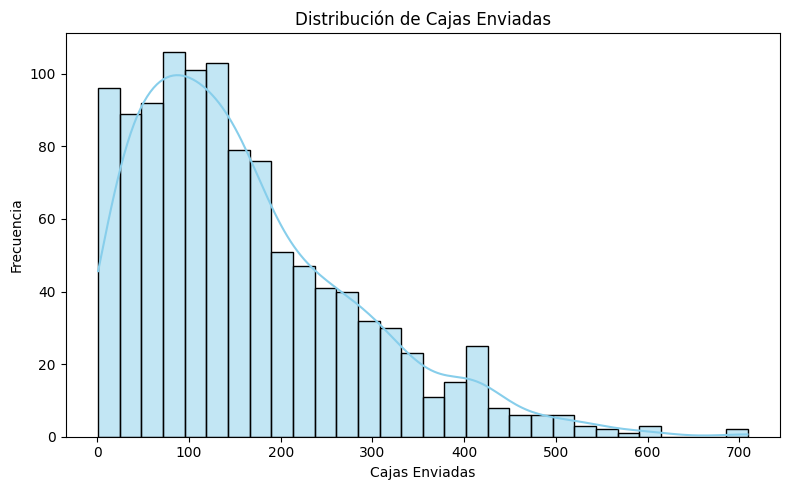

In [20]:
## Distribución de cajas enviadas
plt.figure(figsize=(8, 5))
sns.histplot(df["Boxes Shipped"], bins=30, kde=True, color="skyblue")
plt.title("Distribución de Cajas Enviadas")
plt.xlabel("Cajas Enviadas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

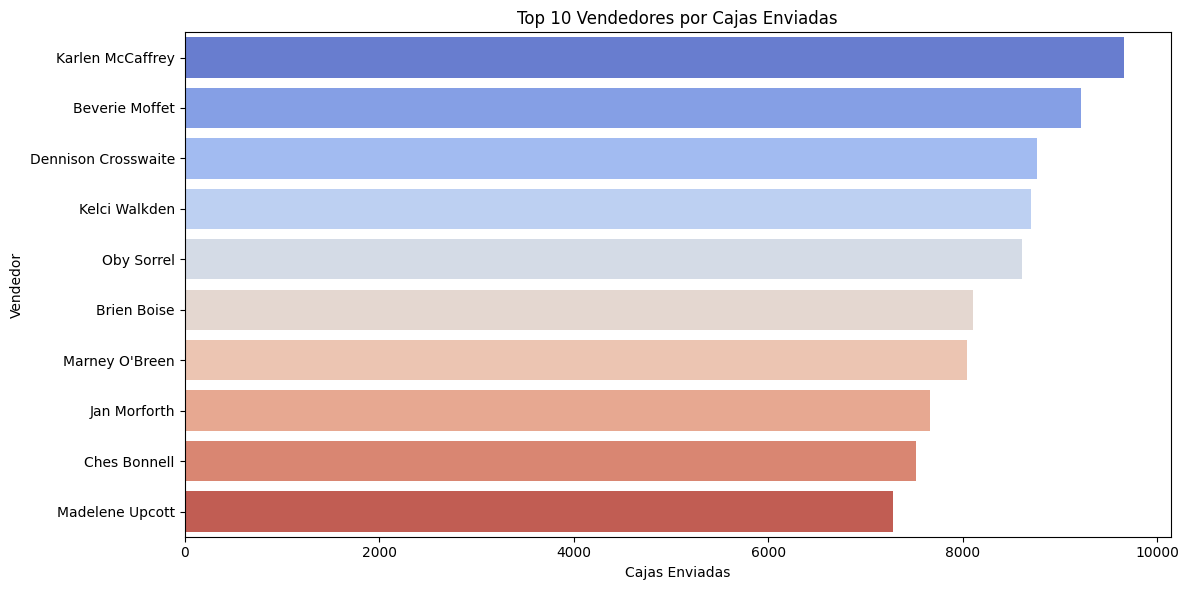

In [21]:
# Gráfico 2: Total de cajas enviadas por vendedor (top 10)
top_sales_people = df.groupby("Sales Person")["Boxes Shipped"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sales_people.values, y=top_sales_people.index, palette="coolwarm")
plt.title("Top 10 Vendedores por Cajas Enviadas")
plt.xlabel("Cajas Enviadas")
plt.ylabel("Vendedor")
plt.tight_layout()
plt.show()

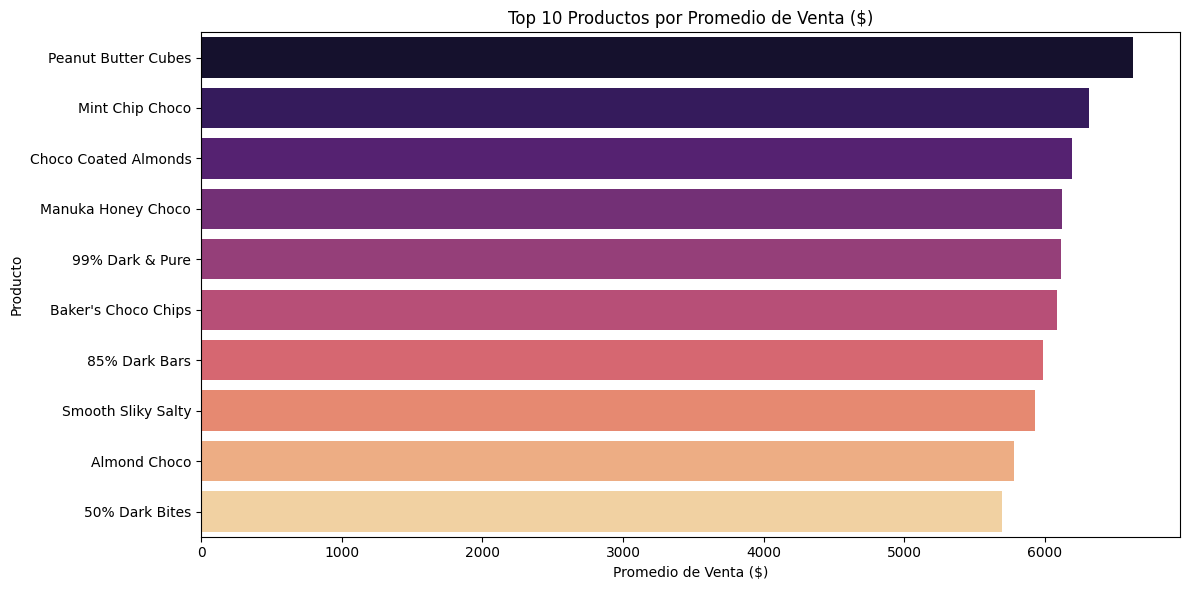

In [22]:
# Gráfico 1: Ventas promedio por producto (top 10 productos)
top_products = df.groupby("Product")["Amount_grafica"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Productos por Promedio de Venta ($)")
plt.xlabel("Promedio de Venta ($)")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()